# Imports

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import time, datetime, itertools, pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
from itertools import permutations

# Read and Visualize results

## 1. Linear kernel

In [9]:
results_df = pd.read_excel("/content/CIFAR_10_linear.xlsx")
results_df.drop("Unnamed: 0", axis=1, inplace=True)

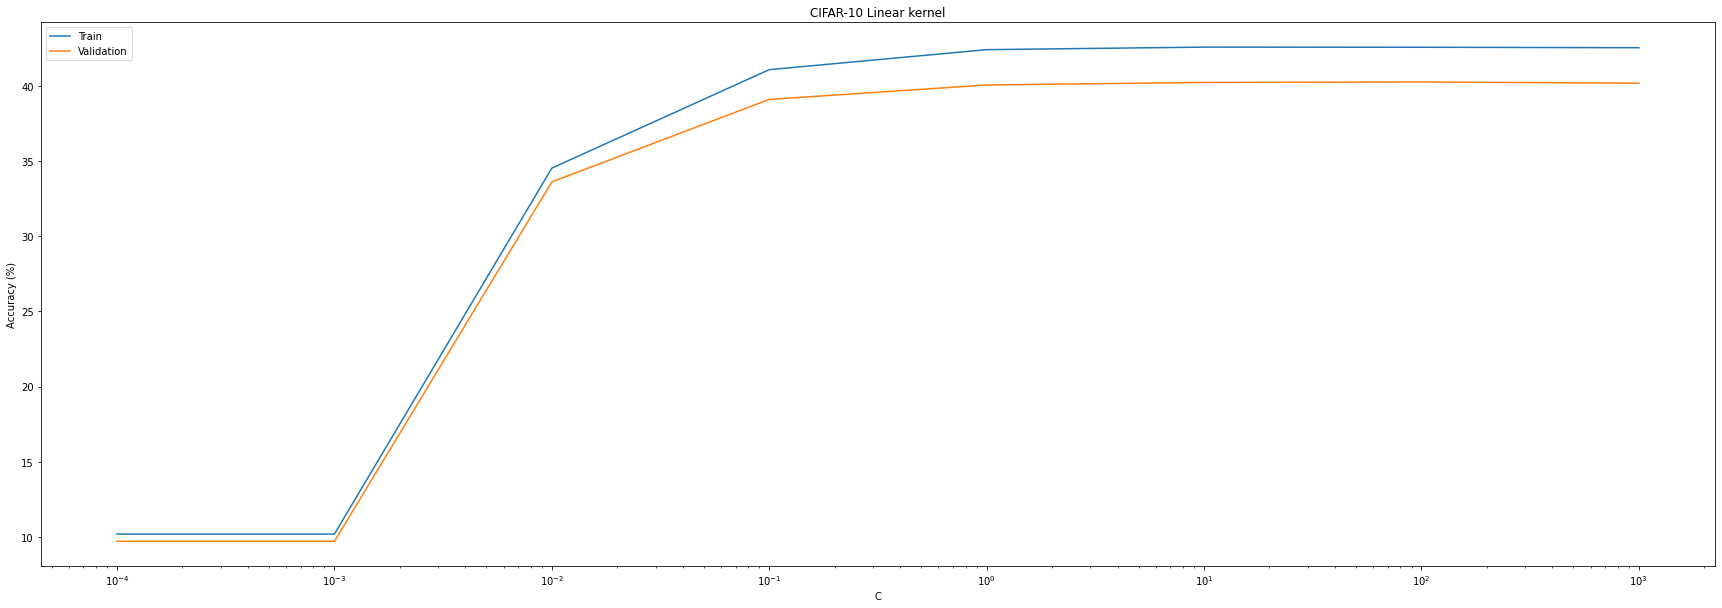

In [10]:
plt.figure(figsize=(30, 10))
plt.plot(results_df['C'].values, results_df['Train accuracy (%)'].values, label='Train')
plt.plot(results_df['C'].values, results_df['Validation accuracy (%)'].values, label='Validation')
plt.xlabel('C')
plt.ylabel('Accuracy (%)')
plt.title("CIFAR-10 Linear kernel")
plt.xscale('log')
plt.legend()
plt.show()

## 2. RBF kernel

In [21]:
for i in range(3):
  rbf_df = pd.read_excel(f"/content/CIFAR_10_rbf_{i}.xlsx")
  rbf_df.drop("Unnamed: 0", axis=1, inplace=True)
  if i == 0:
    results_df = rbf_df
  else:
    results_df = pd.concat([results_df, rbf_df], axis=0)
results_df.reset_index(inplace=True)
results_df.drop('index', axis=1, inplace=True)

In [25]:
results_df[50:100]

,dataset,model,kernel,C,gamma,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
50,Cifar-10,SVM,rbf,10.0,0.0001,30000,20000,10000,100,YES,NO,0h 8min 38sec,10.16,9.75
51,Cifar-10,SVM,rbf,10.0,0.0010,30000,20000,10000,100,YES,NO,0h 8min 1sec,37.51,36.48
52,Cifar-10,SVM,rbf,10.0,0.0100,30000,20000,10000,100,YES,NO,0h 6min 56sec,42.60,41.03
53,Cifar-10,SVM,rbf,10.0,0.1000,30000,20000,10000,100,YES,NO,0h 6min 25sec,53.38,46.80
54,Cifar-10,SVM,rbf,10.0,1.0000,30000,20000,10000,100,YES,NO,0h 7min 10sec,97.38,53.88
55,Cifar-10,SVM,rbf,10.0,10.0000,30000,20000,10000,100,YES,NO,0h 8min 43sec,100.00,28.94
56,Cifar-10,SVM,rbf,10.0,100.0000,30000,20000,10000,100,YES,NO,0h 8min 39sec,100.00,9.93
57,Cifar-10,SVM,rbf,10.0,1000.0000,30000,20000,10000,100,YES,NO,0h 8min 21sec,100.00,9.75
58,Cifar-10,SVM,rbf,10.0,10000.0000,30000,20000,10000,100,YES,NO,0h 7min 49sec,100.00,9.75
59,Cifar-10,SVM,rbf,10.0,100000.0000,30000,20000,10000,100,YES,NO,0h 7min 49sec,100.00,9.75


In [9]:
results_df[results_df['Validation accuracy (%)'] == results_df['Validation accuracy (%)'].max()]

,dataset,model,kernel,C,gamma,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
54,Cifar-10,SVM,rbf,10.0,1.0,30000,20000,10000,100,YES,NO,0h 7min 10sec,97.38,53.88


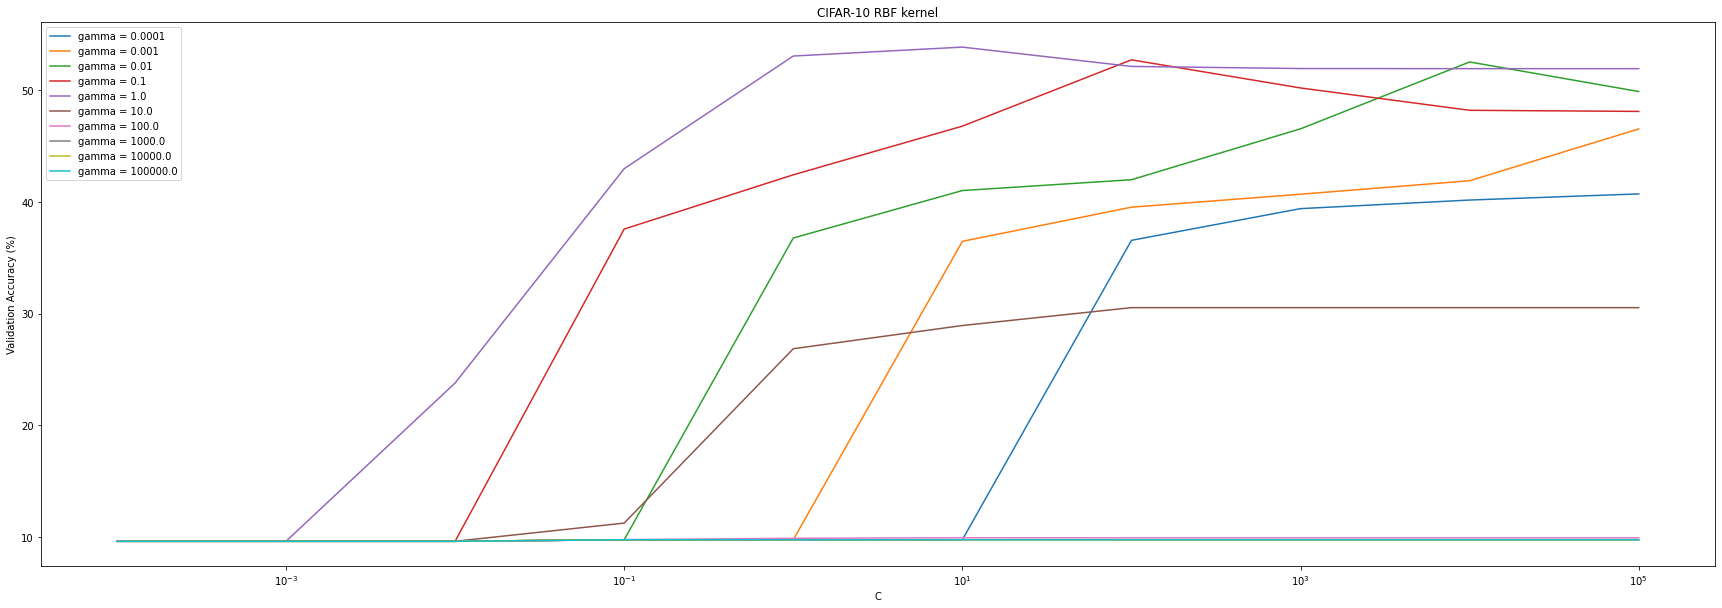

In [3]:
plt.figure(figsize=(30, 10))
for j, gamma in enumerate(np.unique(results_df['gamma'])):
  gamma_df = results_df[results_df['gamma'] == gamma]
  C_list = gamma_df['C'].values
  val_accuracy_list = gamma_df['Validation accuracy (%)'].values
  plt.plot(C_list, val_accuracy_list, label=f'gamma = {gamma}')

plt.xlabel('C')
plt.ylabel('Validation Accuracy (%)')
plt.title(f"CIFAR-10 RBF kernel")
plt.xscale('log')
plt.legend()
plt.show()

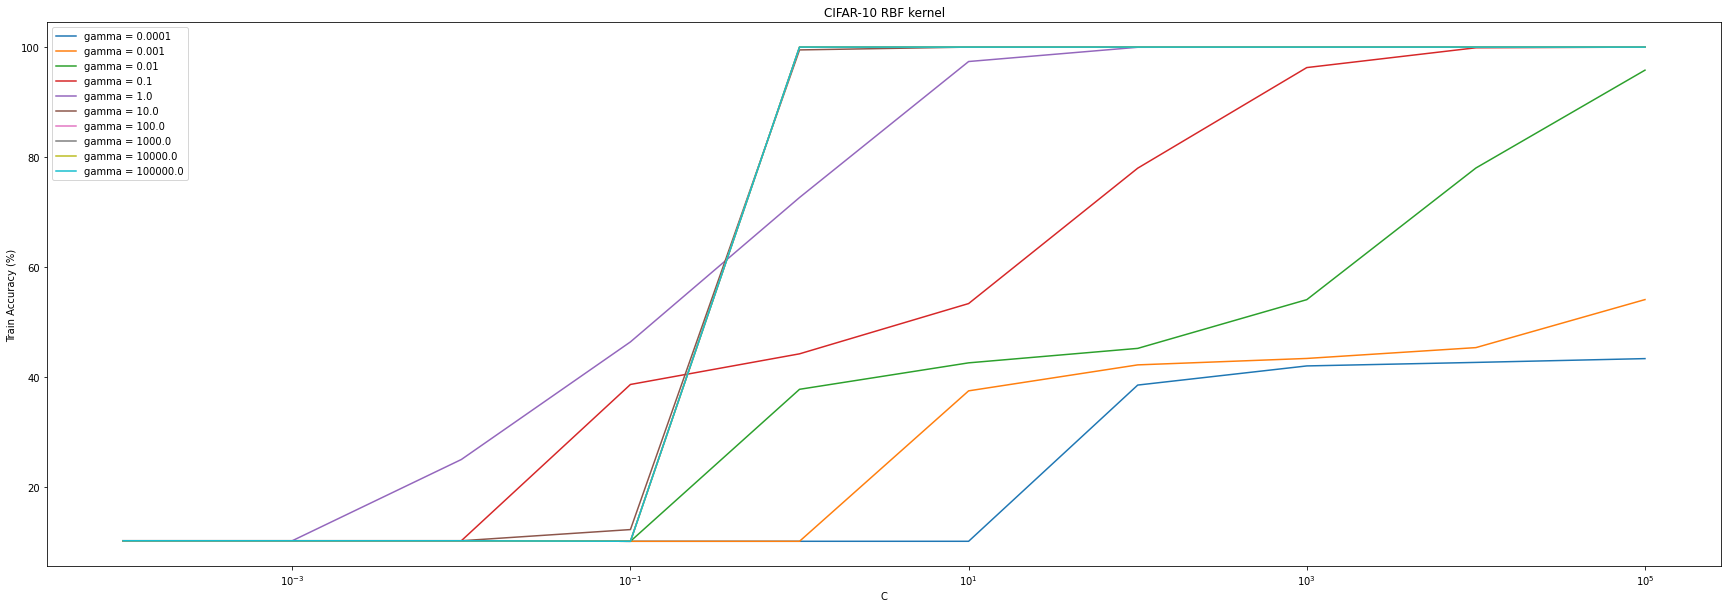

In [4]:
plt.figure(figsize=(30, 10))
for j, gamma in enumerate(np.unique(results_df['gamma'])):
  gamma_df = results_df[results_df['gamma'] == gamma]
  C_list = gamma_df['C'].values
  train_accuracy_list = gamma_df['Train accuracy (%)'].values
  plt.plot(C_list, train_accuracy_list, label=f'gamma = {gamma}')

plt.xlabel('C')
plt.ylabel('Train Accuracy (%)')
plt.title(f"CIFAR-10 RBF kernel")
plt.xscale('log')
plt.legend()
plt.show()

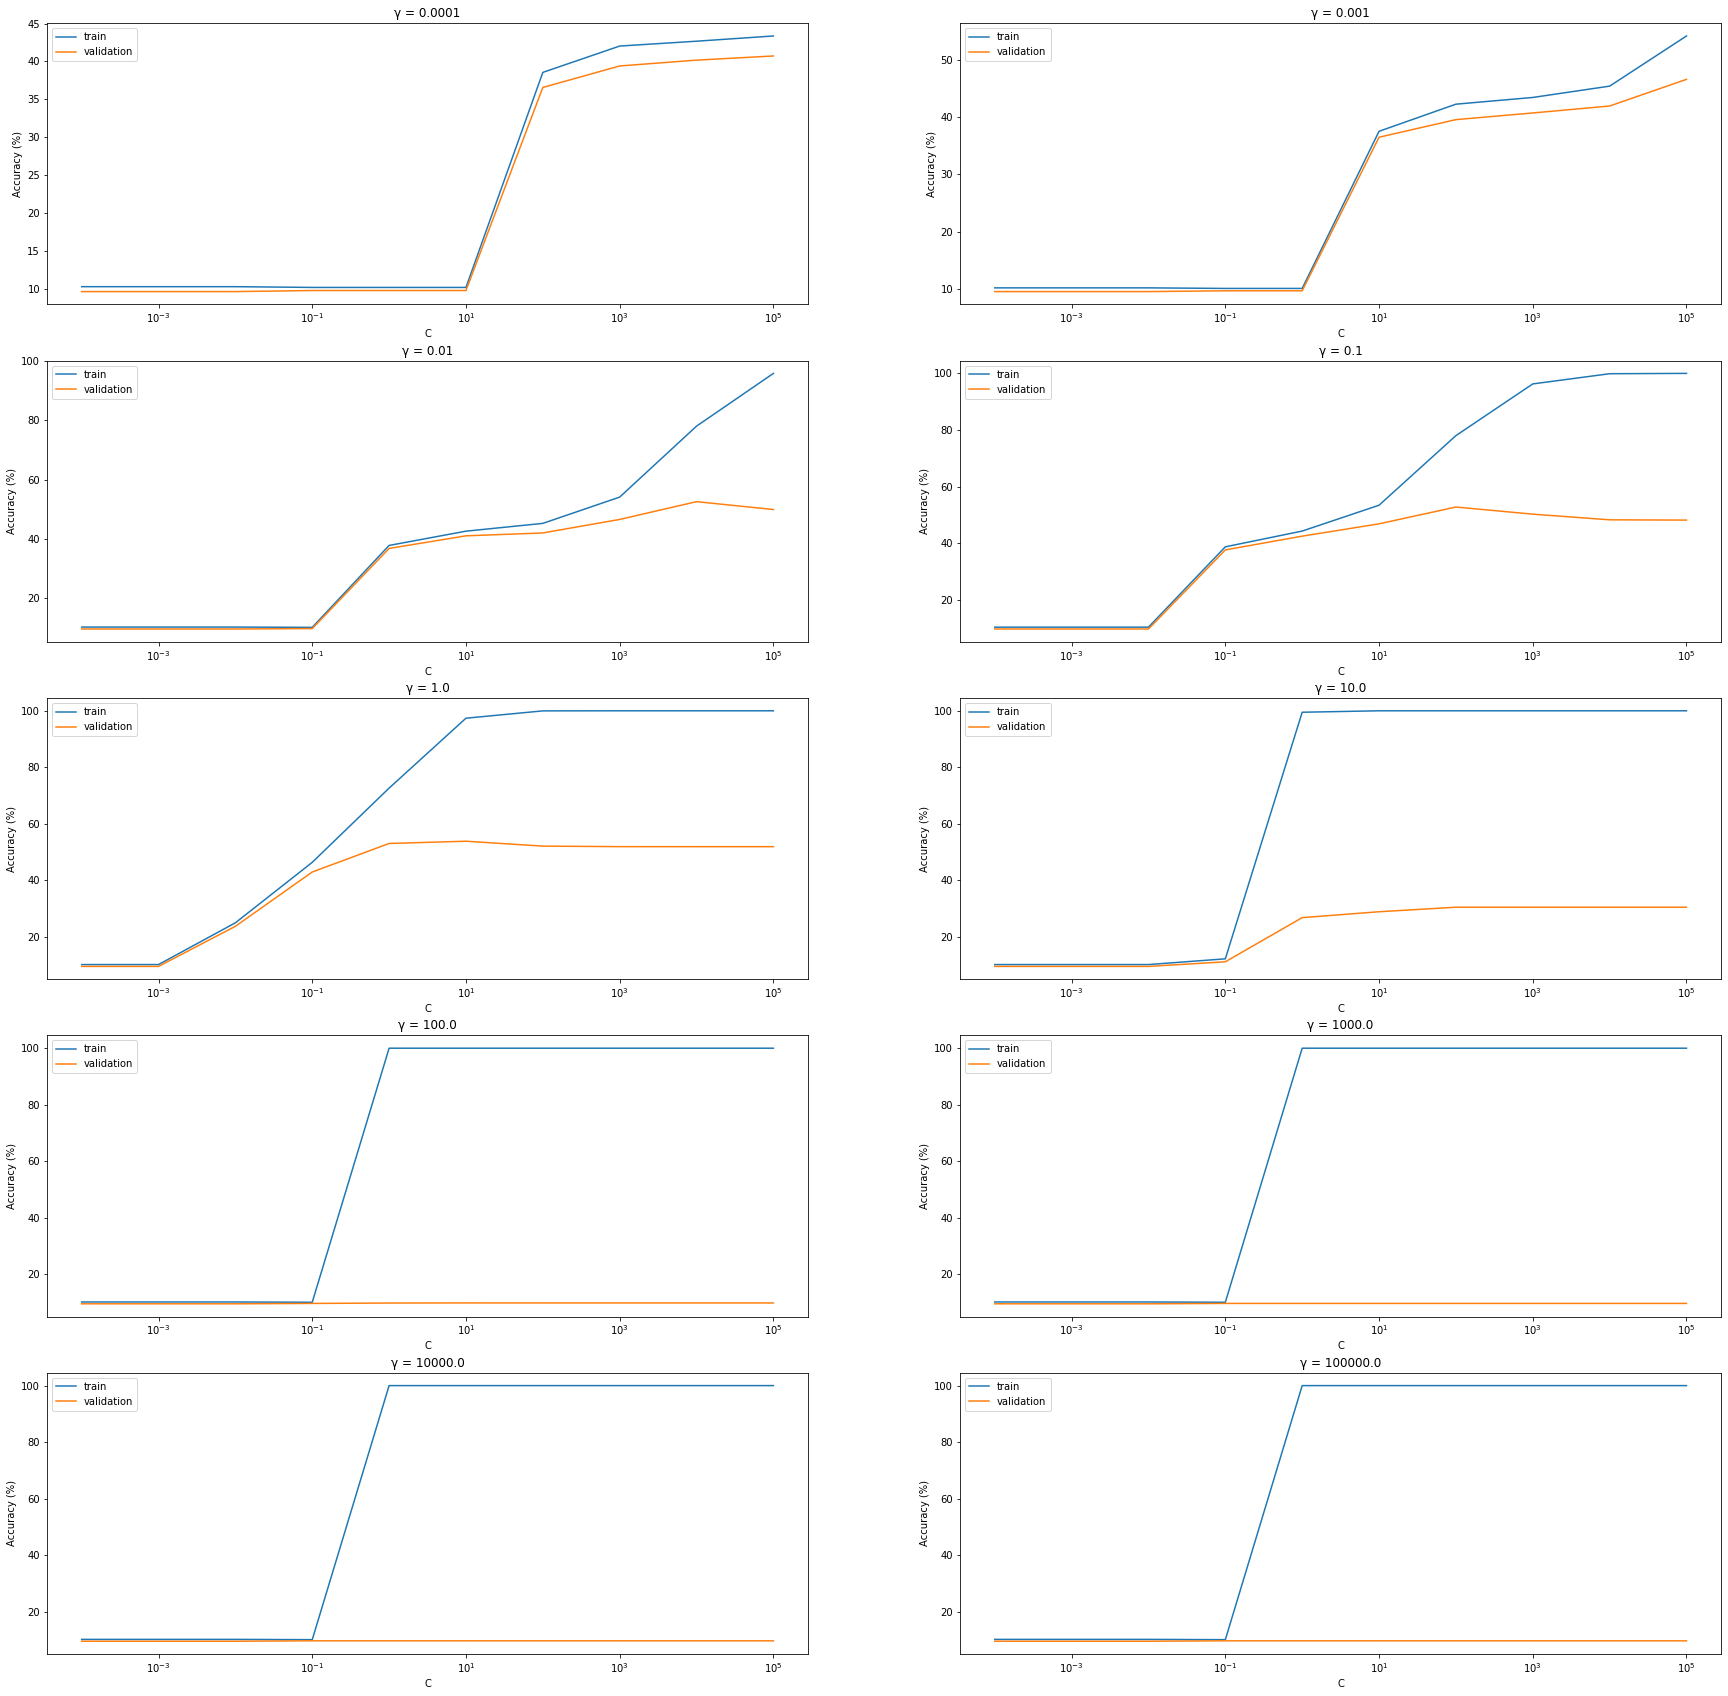

In [7]:
fig, axs = plt.subplots(5, 2, figsize=(30, 30))
# fig.suptitle('CIFAR-10 RBF kernel')
for j, gamma in enumerate(np.unique(results_df['gamma'])):
  gamma_df = results_df[results_df['gamma'] == gamma]
  C_list = gamma_df['C'].values 
  train_accuracy_list = gamma_df['Train accuracy (%)'].values
  val_accuracy_list = gamma_df['Validation accuracy (%)'].values
  axs[j//2, j%2].plot(C_list, train_accuracy_list, label='train')
  axs[j//2, j%2].plot(C_list, val_accuracy_list, label='validation')
  axs[j//2, j%2].set_xscale('log')
  axs[j//2, j%2].set_xlabel("C")
  axs[j//2, j%2].set_ylabel("Accuracy (%)")
  axs[j//2, j%2].set_title(f"γ = {gamma}")
  axs[j//2, j%2].legend()

## 3. Polynomial kernel

In [26]:
results_df = pd.read_excel("/content/CIFAR_10_poly.xlsx")
results_df.drop("Unnamed: 0", axis=1, inplace=True)

In [27]:
results_df

,dataset,model,kernel,degree,C,gamma,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
0,Cifar-10,SVM,poly,2,0.001,irrelevant,30000,20000,10000,100,YES,NO,0h 5min 19sec,40.57,39.08
1,Cifar-10,SVM,poly,2,0.010,irrelevant,30000,20000,10000,100,YES,NO,0h 4min 45sec,43.39,41.03
2,Cifar-10,SVM,poly,2,0.100,irrelevant,30000,20000,10000,100,YES,NO,0h 5min 17sec,51.57,45.77
3,Cifar-10,SVM,poly,2,1.000,irrelevant,30000,20000,10000,100,YES,NO,0h 8min 30sec,75.14,53.03
4,Cifar-10,SVM,poly,2,10.000,irrelevant,30000,20000,10000,100,YES,NO,0h 24min 49sec,94.46,50.32
5,Cifar-10,SVM,poly,2,100.000,irrelevant,30000,20000,10000,100,YES,NO,0h 42min 7sec,99.71,47.56
6,Cifar-10,SVM,poly,2,1000.000,irrelevant,30000,20000,10000,100,YES,NO,0h 43min 50sec,100.00,47.11
7,Cifar-10,SVM,poly,3,0.001,irrelevant,30000,20000,10000,100,YES,NO,0h 5min 8sec,50.38,45.27
8,Cifar-10,SVM,poly,3,0.010,irrelevant,30000,20000,10000,100,YES,NO,0h 6min 22sec,73.44,52.91
9,Cifar-10,SVM,poly,3,0.100,irrelevant,30000,20000,10000,100,YES,NO,0h 13min 55sec,93.54,50.62


In [12]:
results_df[results_df['Validation accuracy (%)'] == results_df['Validation accuracy (%)'].max()]

,dataset,model,kernel,degree,C,gamma,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
3,Cifar-10,SVM,poly,2,1.0,irrelevant,30000,20000,10000,100,YES,NO,0h 8min 30sec,75.14,53.03


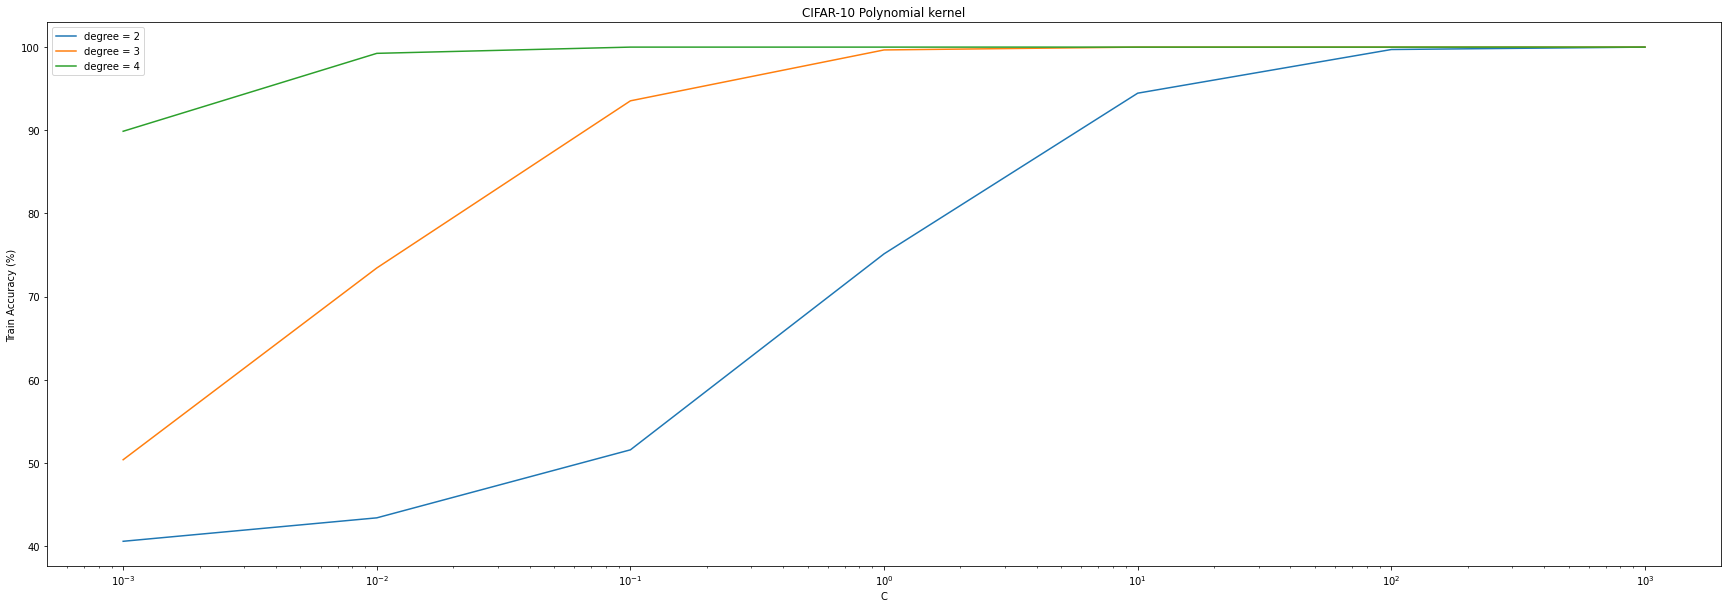

In [16]:
plt.figure(figsize=(30, 10))
for degree in np.unique(results_df['degree']):
  degree_df = results_df[results_df['degree'] == degree]
  C_list = degree_df['C'].values
  val_accuracy_list = degree_df['Train accuracy (%)'].values
  plt.plot(C_list, val_accuracy_list, label=f'degree = {degree}')

plt.xlabel('C')
plt.ylabel('Train Accuracy (%)')
plt.title("CIFAR-10 Polynomial kernel")
plt.xscale('log')
plt.legend()
plt.show()

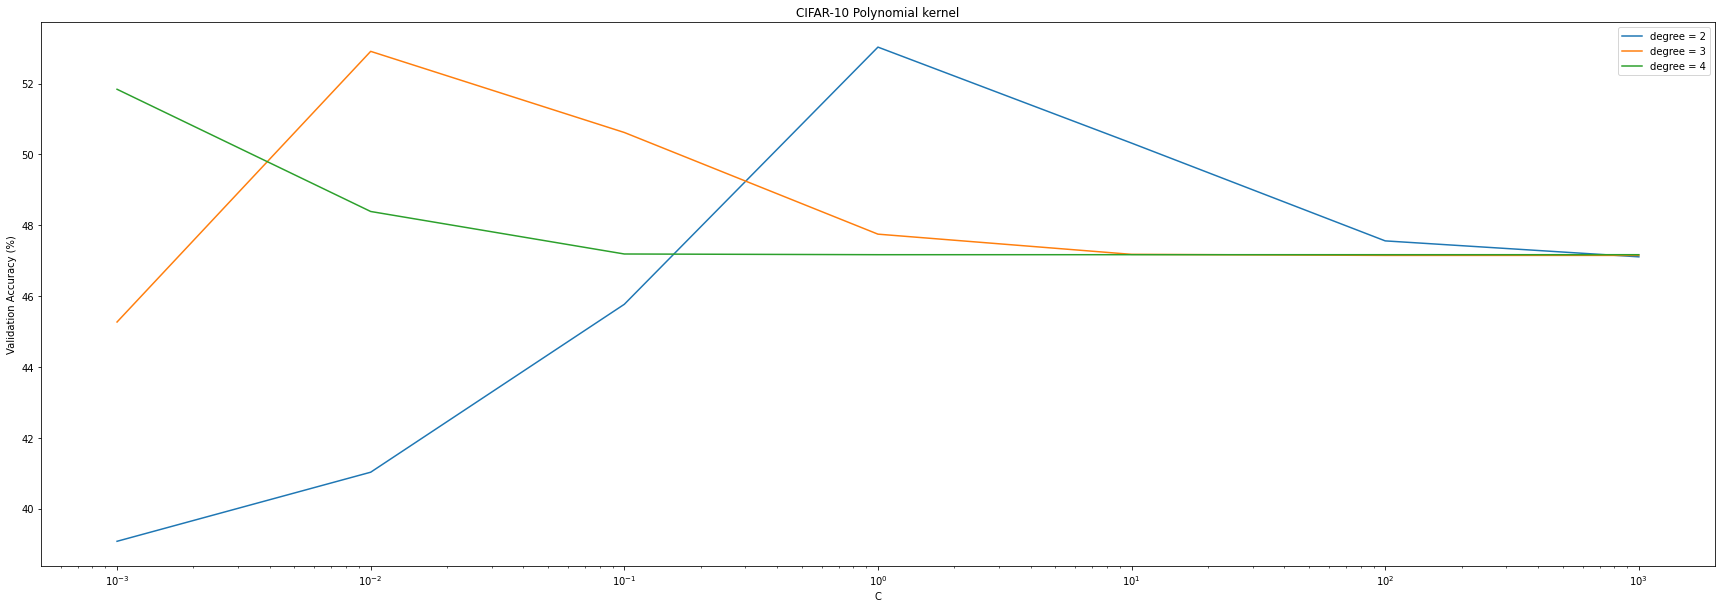

In [15]:
plt.figure(figsize=(30, 10))
for degree in np.unique(results_df['degree']):
  degree_df = results_df[results_df['degree'] == degree]
  C_list = degree_df['C'].values
  val_accuracy_list = degree_df['Validation accuracy (%)'].values
  plt.plot(C_list, val_accuracy_list, label=f'degree = {degree}')

plt.xlabel('C')
plt.ylabel('Validation Accuracy (%)')
plt.title("CIFAR-10 Polynomial kernel")
plt.xscale('log')
plt.legend()
plt.show()

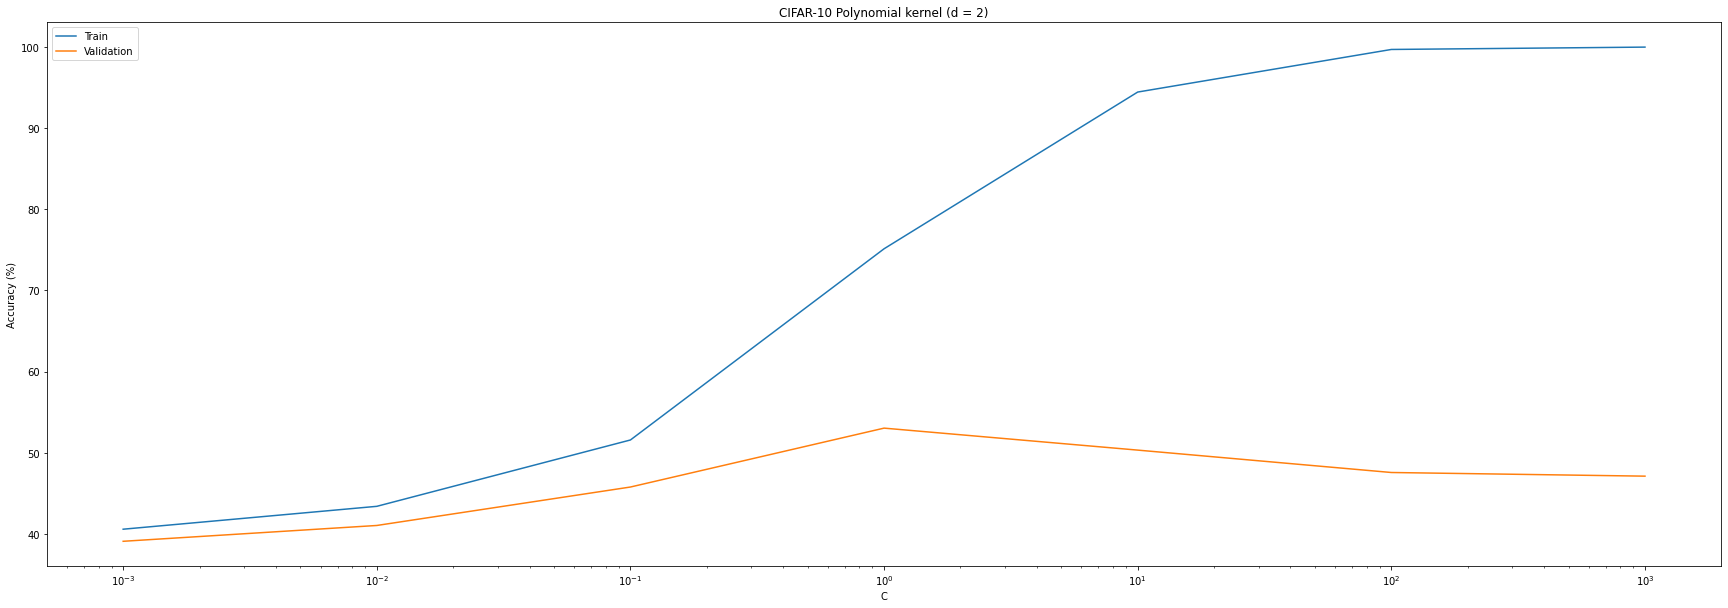

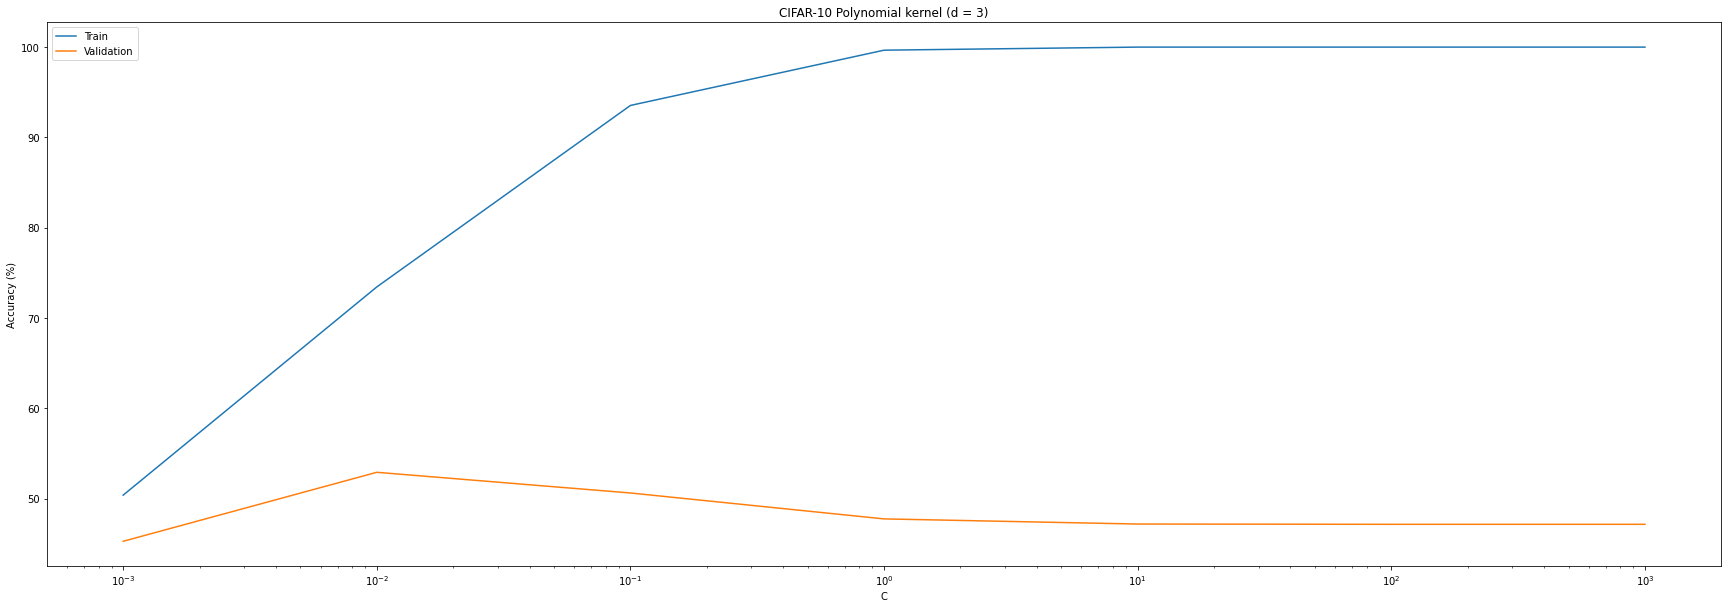

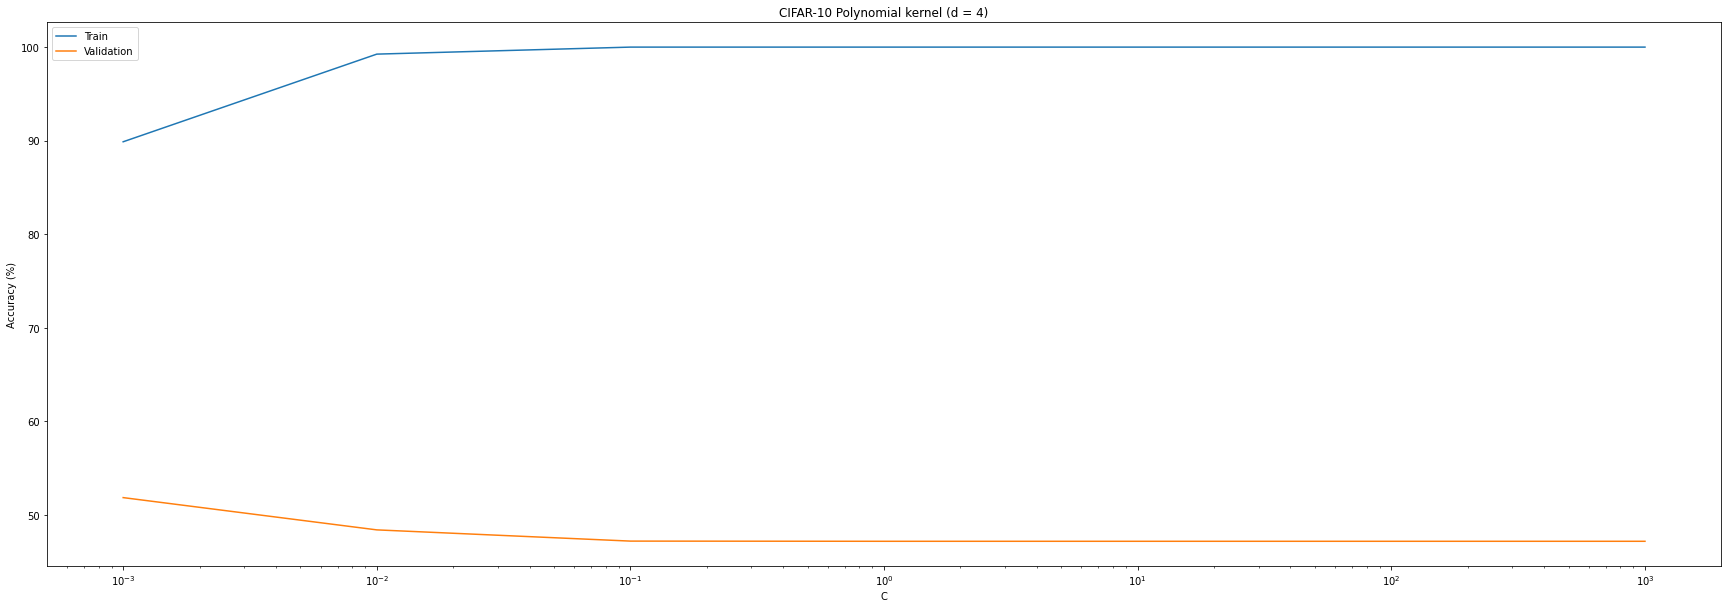

In [18]:
for degree in np.unique(results_df['degree']):
  plt.figure(figsize=(30, 10))
  degree_df = results_df[results_df['degree'] == degree]
  C_list = degree_df['C'].values
  val_accuracy_list = degree_df['Validation accuracy (%)'].values
  train_accuracy_list = degree_df['Train accuracy (%)'].values
  plt.plot(C_list, train_accuracy_list, label='Train')
  plt.plot(C_list, val_accuracy_list, label='Validation')
  plt.xlabel('C')
  plt.ylabel('Accuracy (%)')
  plt.title(f"CIFAR-10 Polynomial kernel (d = {degree})")
  plt.xscale('log')
  plt.legend()
  plt.show()

## 4. Sigmoid kernel

In [28]:
results_df = pd.read_excel("/content/CIFAR_10_sigmoid.xlsx")
results_df.drop("Unnamed: 0", axis=1, inplace=True)

In [29]:
results_df

,dataset,model,kernel,degree,C,gamma,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
0,Cifar-10,SVM,sigmoid,irrelevant,0.001,irrelevant,30000,20000,10000,100,YES,NO,0h 2min 52sec,10.11,9.84
1,Cifar-10,SVM,sigmoid,irrelevant,0.010,irrelevant,30000,20000,10000,100,YES,NO,0h 3min 1sec,10.11,9.84
2,Cifar-10,SVM,sigmoid,irrelevant,0.100,irrelevant,30000,20000,10000,100,YES,NO,0h 3min 1sec,10.11,9.84
3,Cifar-10,SVM,sigmoid,irrelevant,1.000,irrelevant,30000,20000,10000,100,YES,NO,0h 3min 0sec,10.11,9.84
4,Cifar-10,SVM,sigmoid,irrelevant,10.000,irrelevant,30000,20000,10000,100,YES,NO,0h 3min 2sec,10.11,9.84
5,Cifar-10,SVM,sigmoid,irrelevant,100.000,irrelevant,30000,20000,10000,100,YES,NO,0h 3min 0sec,10.11,9.84
6,Cifar-10,SVM,sigmoid,irrelevant,1000.000,irrelevant,30000,20000,10000,100,YES,NO,0h 2min 60sec,10.11,9.84


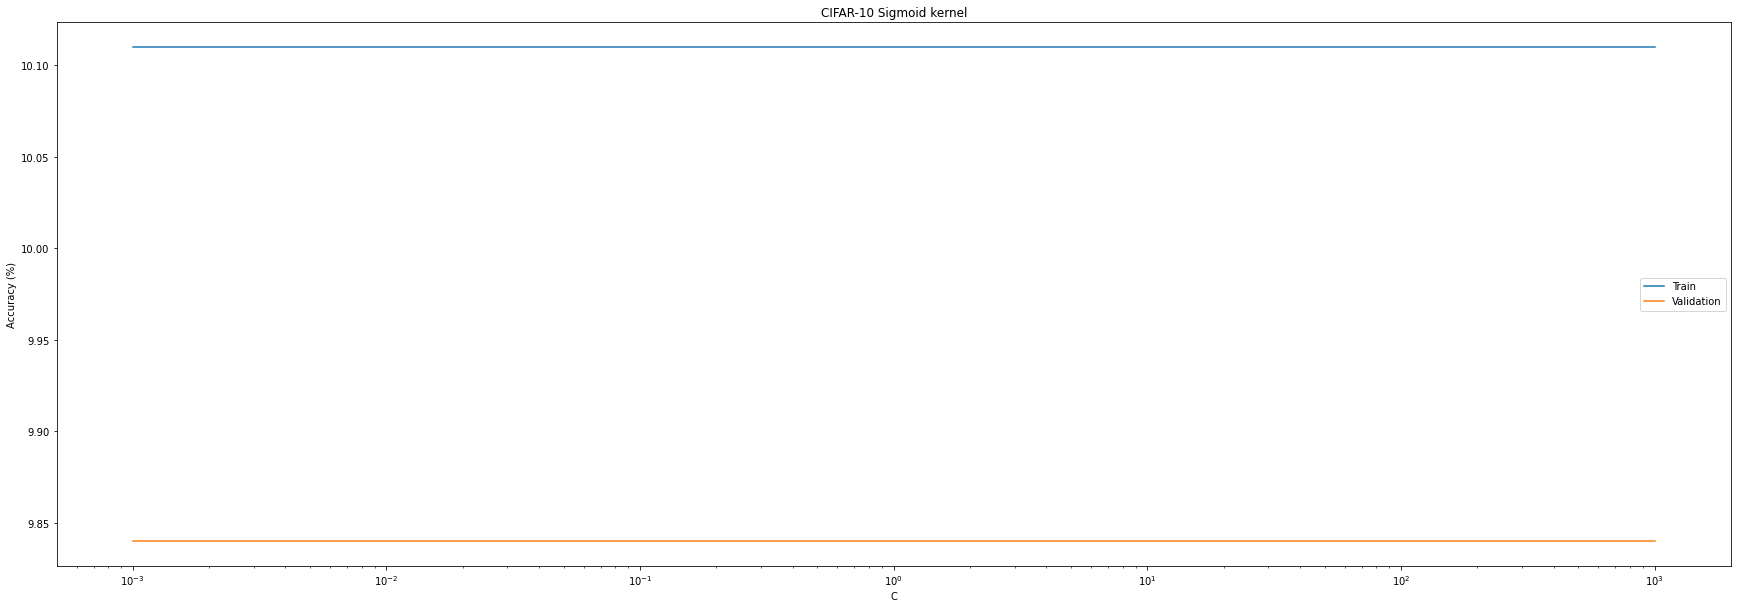

In [21]:
plt.figure(figsize=(30, 10))
plt.plot(results_df['C'].values, results_df['Train accuracy (%)'].values, label='Train')
plt.plot(results_df['C'].values, results_df['Validation accuracy (%)'].values, label='Validation')
plt.xlabel('C')
plt.ylabel('Accuracy (%)')
plt.title("CIFAR-10 Sigmoid kernel")
plt.xscale('log')
plt.legend()
plt.show()

## 5. KNN

In [31]:
results_df = pd.read_excel("/content/CIFAR_10_KNN.xlsx")
results_df.drop("Unnamed: 0", axis=1, inplace=True)

In [17]:
df = results_df[(results_df['weights'] == 'uniform') & (results_df['K'] >= 10)]
df[df['Validation accuracy (%)'] == df['Validation accuracy (%)'].max()]

,dataset,model,K,weights,N_train,N_validation,N_test,D,PCA_applied,k-fold Cross-Validation applied,Time elapsed,Train accuracy (%),Validation accuracy (%)
9,Cifar-10,KNN,10,uniform,30000,20000,10000,100,YES,NO,0h 0min 41sec,37.25,28.13


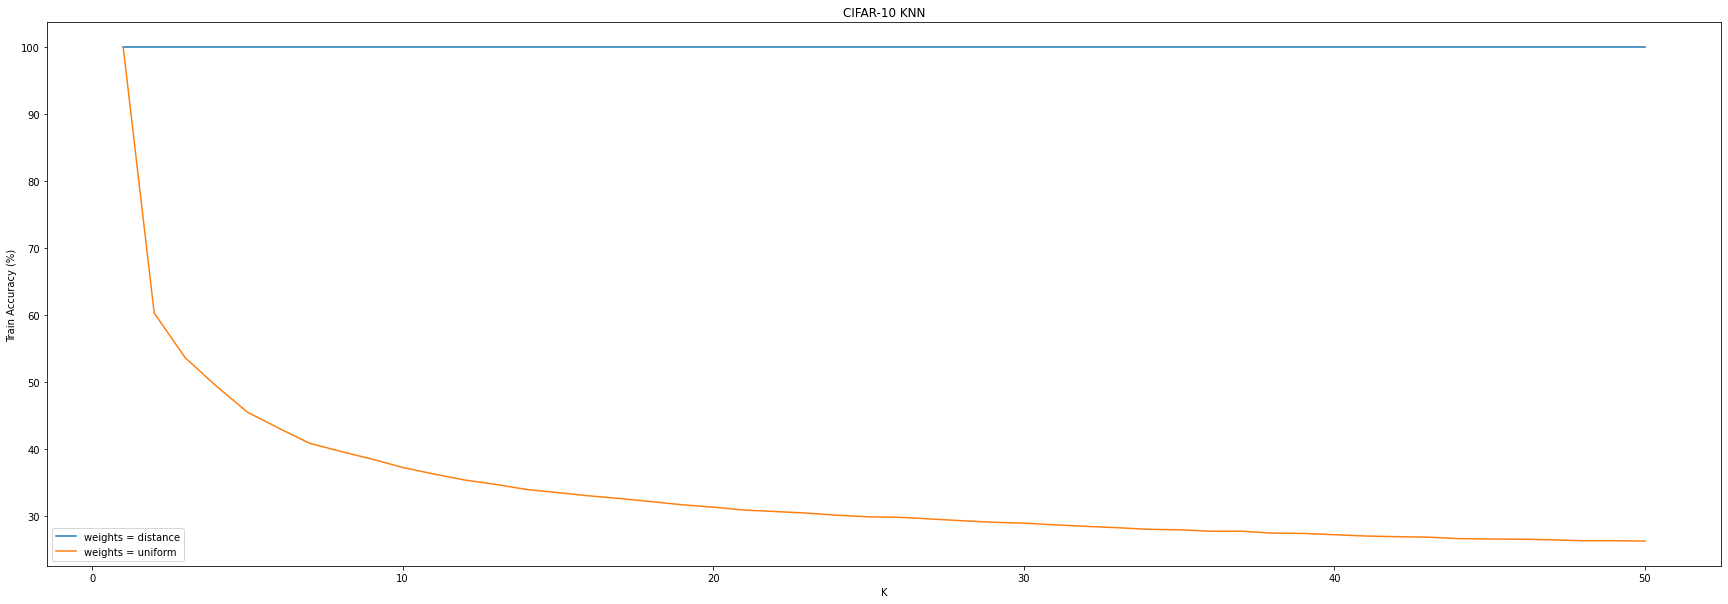

In [39]:
plt.figure(figsize=(30, 10))
for weight in np.unique(results_df['weights']):
  weight_df = results_df[results_df['weights'] == weight]
  K_list = weight_df['K'].values
  train_accuracy_list = weight_df['Train accuracy (%)'].values
  plt.plot(K_list, train_accuracy_list, label=f'weights = {weight}')

plt.xlabel('K')
plt.ylabel('Train Accuracy (%)')
plt.title("CIFAR-10 KNN")
plt.legend()
plt.show()

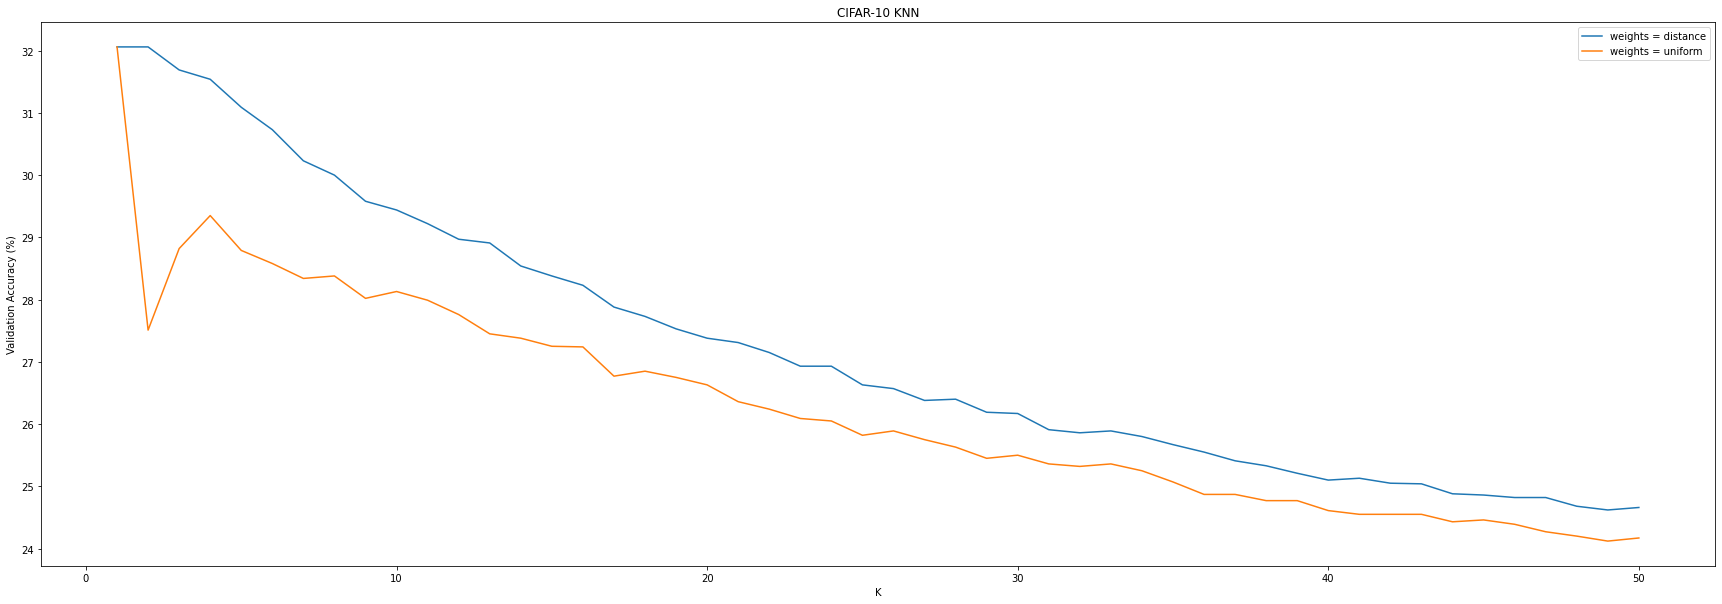

In [43]:
plt.figure(figsize=(30, 10))
for weight in np.unique(results_df['weights']):
  weight_df = results_df[results_df['weights'] == weight]
  K_list = weight_df['K'].values
  val_accuracy_list = weight_df['Validation accuracy (%)'].values
  plt.plot(K_list, val_accuracy_list, label=f'weights = {weight}')

plt.xlabel('K')
plt.ylabel('Validation Accuracy (%)')
plt.title("CIFAR-10 KNN")
plt.legend()
plt.show()

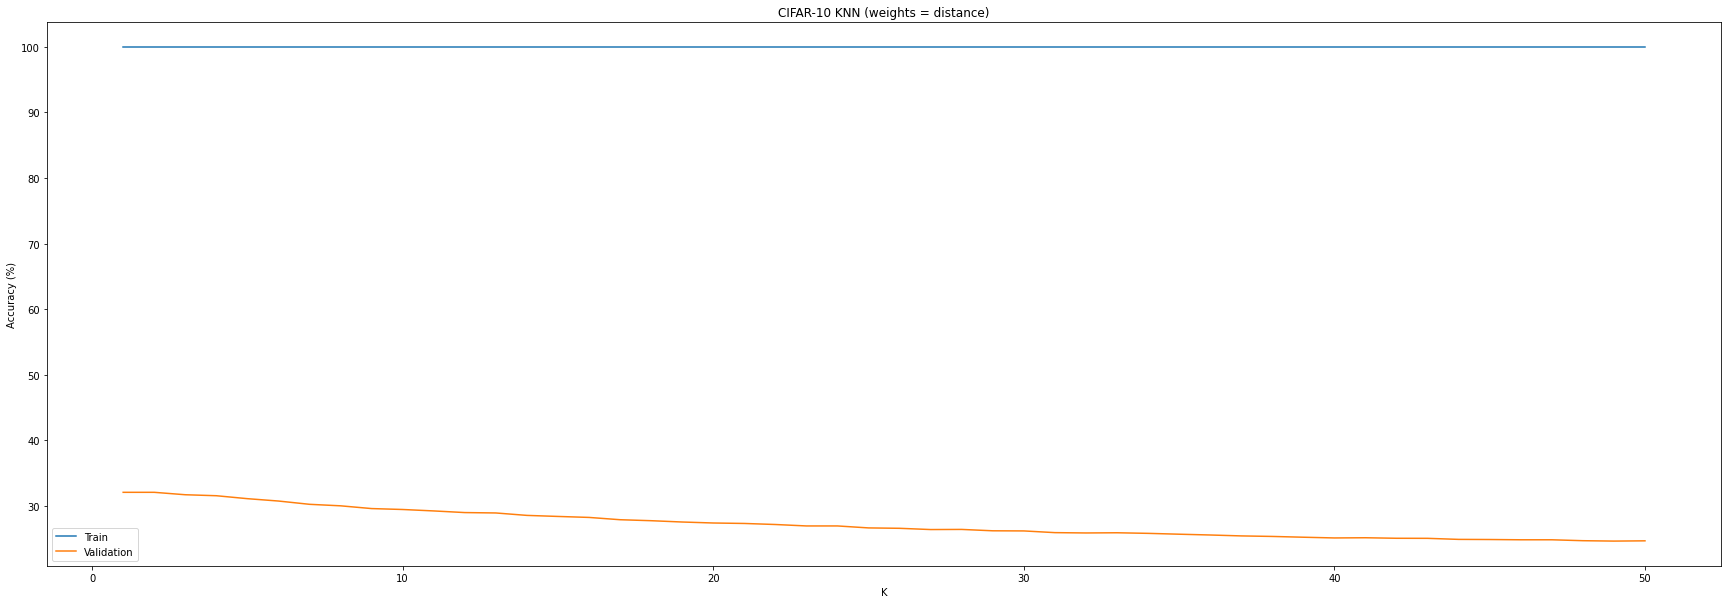

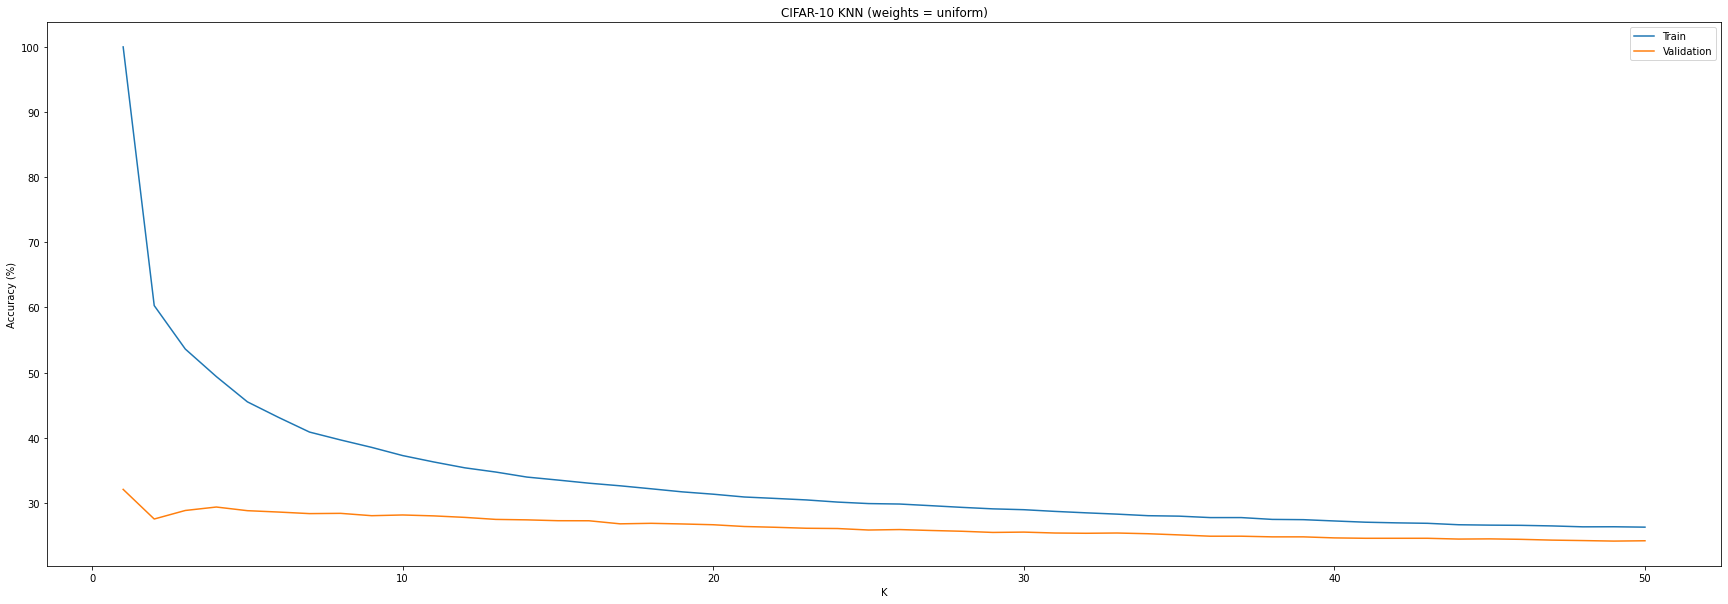

In [44]:
for weight in np.unique(results_df['weights']):
  plt.figure(figsize=(30, 10))
  weight_df = results_df[results_df['weights'] == weight]
  K_list = weight_df['K'].values
  val_accuracy_list = weight_df['Validation accuracy (%)'].values
  train_accuracy_list = weight_df['Train accuracy (%)'].values
  plt.plot(K_list, train_accuracy_list, label='Train')
  plt.plot(K_list, val_accuracy_list, label='Validation')
  plt.xlabel('K')
  plt.ylabel('Accuracy (%)')
  plt.title(f"CIFAR-10 KNN (weights = {weight})")
  # plt.xscale('log')
  plt.legend()
  plt.show()